# Car price Predictor

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing 
  
%matplotlib inline

In [2]:
car = pd.read_csv('car_data.csv')

## Data Description

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [7]:
print(car["Fuel_Type"].value_counts())
print(car["Seller_Type"].value_counts())
print(car["Transmission"].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Convert to numerical data using  Label encoder

Fuel_Type | Seller_Type | Transmission

In [8]:
car_data = car.drop("Car_Name", axis=1) 
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
car_data['Fuel_Type']= label_encoder.fit_transform(car_data['Fuel_Type']) 
car_data['Seller_Type']= label_encoder.fit_transform(car_data['Seller_Type']) 
car_data['Transmission']= label_encoder.fit_transform(car_data['Transmission']) 

print(car_data['Fuel_Type'].unique()) 
print(car_data['Seller_Type'].unique()) 
print(car_data['Transmission'].unique()) 

[2 1 0]
[0 1]
[1 0]


In [10]:
car_data.head(22)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0
5,2018,9.25,9.83,2071,1,0,1,0
6,2015,6.75,8.12,18796,2,0,1,0
7,2015,6.50,8.61,33429,1,0,1,0
8,2016,8.75,8.89,20273,1,0,1,0
9,2015,7.45,8.92,42367,1,0,1,0


## Checking for missing values

In [11]:
car_data.isnull()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False


## Checking correlations

In [12]:
corr_matrix = car_data.corr()
corr_matrix['Selling_Price'].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878983
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Transmission    -0.367128
Fuel_Type       -0.509467
Seller_Type     -0.550724
Name: Selling_Price, dtype: float64

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

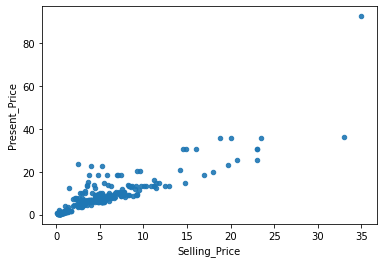

In [13]:
car.plot(kind="scatter", x="Selling_Price", y="Present_Price", alpha=0.9)

In [14]:
print(car["Fuel_Type"].value_counts())
print(car["Seller_Type"].value_counts())
print(car["Transmission"].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Stratified Train-Test Split

In [15]:
split_cols = ['Seller_Type', 'Transmission']
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size =0.2, random_state=42)
for train_index, test_index in split.split(car_data, car_data[split_cols]):
    strat_train_set = car_data.loc[train_index]
    strat_test_set = car_data.loc[test_index]

In [16]:
print(strat_train_set['Transmission'].value_counts())
print(strat_test_set['Transmission'].value_counts())
print(strat_train_set['Fuel_Type'].value_counts())
print(strat_test_set['Fuel_Type'].value_counts())
print(strat_train_set['Seller_Type'].value_counts())
print(strat_test_set['Seller_Type'].value_counts())

1    208
0     32
Name: Transmission, dtype: int64
1    53
0     8
Name: Transmission, dtype: int64
2    193
1     46
0      1
Name: Fuel_Type, dtype: int64
2    46
1    14
0     1
Name: Fuel_Type, dtype: int64
0    155
1     85
Name: Seller_Type, dtype: int64
0    40
1    21
Name: Seller_Type, dtype: int64


## Creating the proper training set

In [17]:
car_train_data = strat_train_set.copy()
car_train_data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
185,2008,0.25,0.58,1900,2,1,0,0
32,2014,4.95,7.49,39000,1,0,1,0
158,2017,0.48,0.54,8600,2,1,1,0
187,2013,0.25,0.51,32000,2,1,1,0
104,2017,1.35,1.47,4100,2,1,1,0
...,...,...,...,...,...,...,...,...
28,2010,1.95,3.95,44542,2,0,1,0
87,2012,5.90,13.74,56000,2,0,1,0
204,2015,2.75,4.43,28282,2,0,1,0
213,2011,2.90,6.79,31604,2,0,1,0


In [18]:
car_train_data_features = car_train_data.drop("Selling_Price", axis=1)
car_train_data_labels = car_train_data["Selling_Price"].copy()
car_train_data_labels

185    0.25
32     4.95
158    0.48
187    0.25
104    1.35
       ... 
28     1.95
87     5.90
204    2.75
213    2.90
252    5.40
Name: Selling_Price, Length: 240, dtype: float64

## Standardising using pipeline

In [19]:
# Fit
# We will automate the imputation and scaling using pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [20]:
# Transform
car_train_data_features_tr = my_pipeline.fit_transform(car_train_data_features)
car_train_data_features_tr.shape

(240, 7)

## Creating the model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(car_train_data_features_tr, car_train_data_labels)

RandomForestRegressor()

In [22]:
# Checking on some train set data
some_data = car_train_data_features.iloc[:5]
some_labels = car_train_data_labels.iloc[:5]
prepared_data = my_pipeline.fit_transform(some_data)
model.predict(prepared_data)

array([ 1.7085, 11.6774,  1.524 ,  1.29  ,  3.6355])

In [23]:
some_labels

185    0.25
32     4.95
158    0.48
187    0.25
104    1.35
Name: Selling_Price, dtype: float64

## Saving the model

In [24]:
from joblib import dump, load
dump(model, 'Car.joblib') 

['Car.joblib']

## Testing the model

In [25]:
from sklearn.metrics import mean_squared_error
x_test = strat_test_set.drop("Selling_Price", axis = 1)
y_test = strat_test_set["Selling_Price"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predict = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predict)
final_rmse = np.sqrt(final_mse)
final_rmse

8.211527003907475

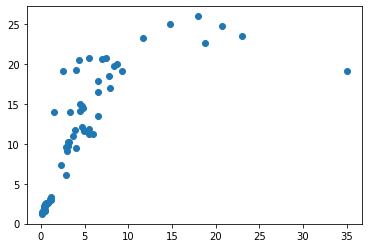

In [26]:
plt.scatter(y_test, final_predict)